# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# API base URL
units = 'metric'
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | kongwa
Processing Record 7 of Set 1 | fale old settlement
Processing Record 8 of Set 1 | muroto-misakicho
Processing Record 9 of Set 1 | gallivare
City not found. Skipping...
Processing Record 10 of Set 1 | yambio
Processing Record 11 of Set 1 | talata mafara
Processing Record 12 of Set 1 | luwuk
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | los santos
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | bandarbeyla
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | santa cruz
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | puerto baquerizo moreno
Processing Record 21 of Se

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,23.05,85,0,0.00,US,1721617512
1,punta arenas,-53.1500,-70.9167,5.06,70,0,16.98,CL,1721617359
2,port elizabeth,-33.9180,25.5701,9.06,90,0,2.06,ZA,1721617514
3,ilulissat,69.2167,-51.1000,6.01,87,71,1.54,GL,1721617515
4,bredasdorp,-34.5322,20.0403,5.80,89,3,1.82,ZA,1721617516


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,23.05,85,0,0.00,US,1721617512
1,punta arenas,-53.1500,-70.9167,5.06,70,0,16.98,CL,1721617359
2,port elizabeth,-33.9180,25.5701,9.06,90,0,2.06,ZA,1721617514
3,ilulissat,69.2167,-51.1000,6.01,87,71,1.54,GL,1721617515
4,bredasdorp,-34.5322,20.0403,5.80,89,3,1.82,ZA,1721617516


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

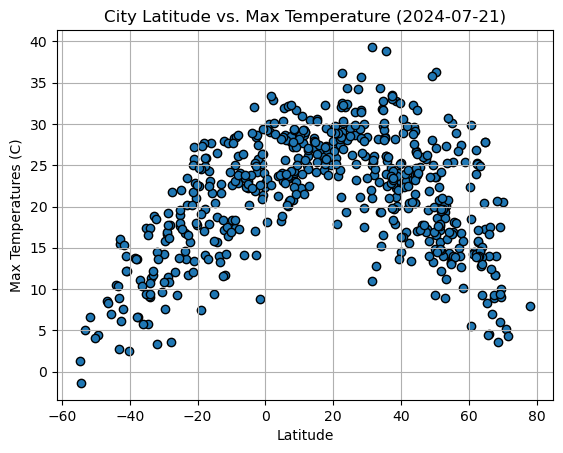

In [53]:
# scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
temp = city_data_df['Max Temp']
plt.scatter(lat, temp, edgecolors='black')

# other graph properties
plt.title('City Latitude vs. Max Temperature (2024-07-21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperatures (C)')
plt.grid(True)

# Save the figure
plt.savefig('output_data/Fig01.png')

# Show plot
plt.show()

#### Latitude Vs. Humidity

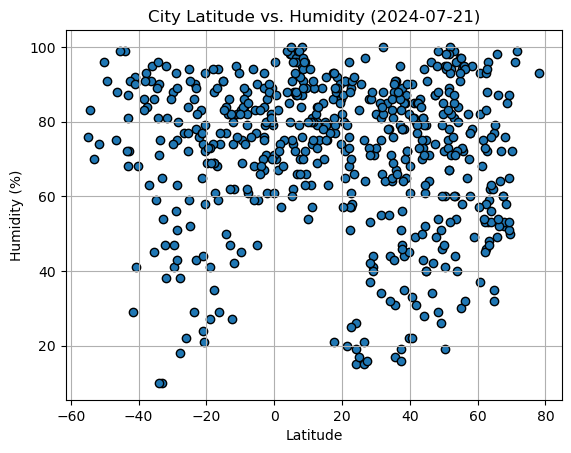

In [54]:
# scatter plot for latitude vs. humidity
lat = city_data_df['Lat']
hum = city_data_df['Humidity']
plt.scatter(lat, hum, edgecolors='black')

# other graph properties
plt.title('City Latitude vs. Humidity (2024-07-21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig02.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

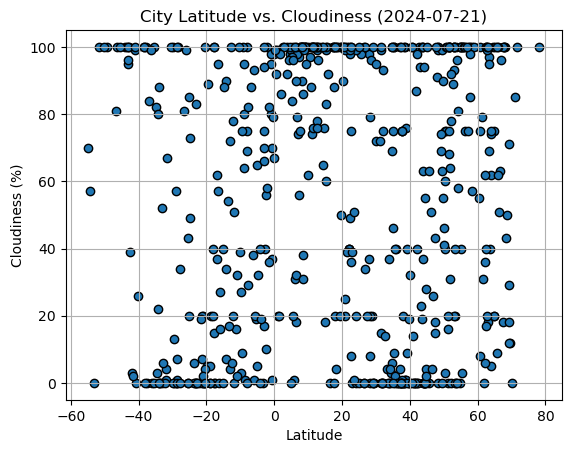

In [55]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df['Lat']
cloud = city_data_df['Cloudiness']
plt.scatter(lat, cloud, edgecolors='black')

# other graph properties
plt.title('City Latitude vs. Cloudiness (2024-07-21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig03.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

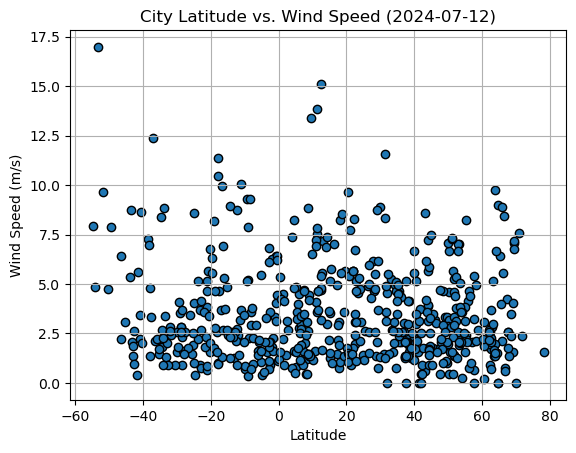

In [56]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df['Lat']
wind = city_data_df['Wind Speed']
plt.scatter(lat, wind, edgecolors='black')

# other graph properties
plt.title('City Latitude vs. Wind Speed (2024-07-12)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig04.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [57]:
# Define a function to create Linear Regression plots
def linear_regression(x, y, xlabel='X-axis', ylabel='Y-axis', save_path=None):
    
    slope, intercept, r, p, std_err = linregress(x, y)

    line = slope * x + intercept

    plt.scatter(x, y)
    plt.plot(x, line, "-", color='red', label=f"y={slope:.2f}x + {intercept:.2f}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{xlabel} vs {ylabel}")

    eqn = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(eqn, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=14, color='red')

    r_squared = r ** 2

    if save_path:
        plt.savefig(save_path)
    
    print(f"The r^2 value is: {r_squared}")
    
    plt.show()

In [58]:
# DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,23.05,85,0,0.00,US,1721617512
3,ilulissat,69.2167,-51.1000,6.01,87,71,1.54,GL,1721617515
7,muroto-misakicho,33.2833,134.1500,28.19,85,4,5.26,JP,1721617520
8,yambio,4.5721,28.3955,18.21,98,98,1.59,SS,1721617523
9,talata mafara,12.5732,6.0597,24.62,84,99,4.70,NG,1721617524


In [59]:
# DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,punta arenas,-53.1500,-70.9167,5.06,70,0,16.98,CL,1721617359
2,port elizabeth,-33.9180,25.5701,9.06,90,0,2.06,ZA,1721617514
4,bredasdorp,-34.5322,20.0403,5.80,89,3,1.82,ZA,1721617516
5,kongwa,-6.2000,36.4167,14.09,94,38,1.59,TZ,1721617518
6,fale old settlement,-9.3852,-171.2468,28.36,75,9,9.29,TK,1721617519


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.3381229590664556


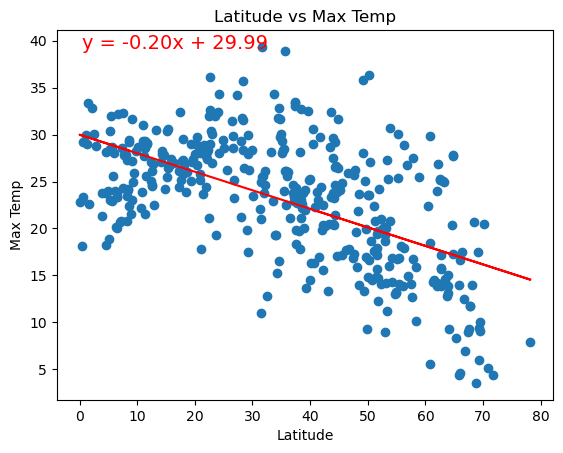

In [60]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
xlabel = 'Latitude'
ylabel = 'Max Temp'

linear_regression(x, y, xlabel, ylabel, 'output_data/Fig05.png')

The r^2 value is: 0.5518436005752689


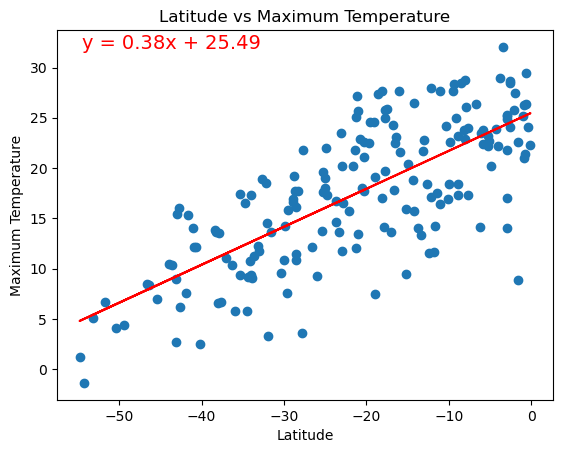

In [61]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
xlabel = 'Latitude'
ylabel = 'Maximum Temperature'

linear_regression(x, y, xlabel, ylabel, 'output_data/Fig06.png')

**Discussion about the linear relationship:** 

In the Northern Hemisphere, the r^2 value of approximately 0.338 indicates that 33.8% of the variation in Max Temperature can be explained by Latitude, suggesting a moderate level of relationship between latitude and maximum temperature. 

Conversely, in the Southern Hemisphere, the higher r^2 value of approximately 0.552 indicates that 55.2% of the variation in Max Temperature can be explained by Latitude, indicating a stronger relationship between Latitude and Max Temperature in this hemisphere. "

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.03243295705302613


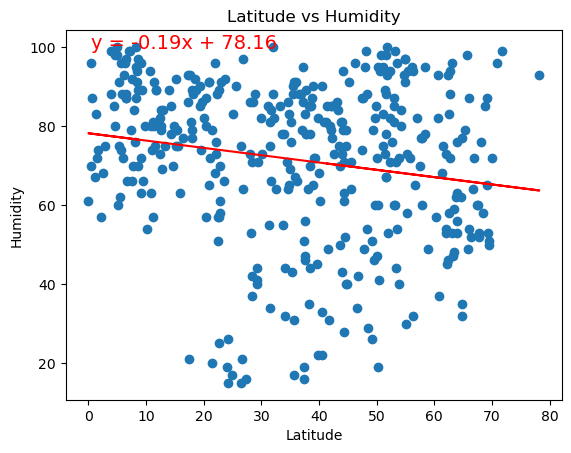

In [62]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
xlabel = 'Latitude'
ylabel = 'Humidity'

linear_regression(x, y, xlabel, ylabel, 'output_data/Fig07.png')

The r^2 value is: 0.0003344605354000905


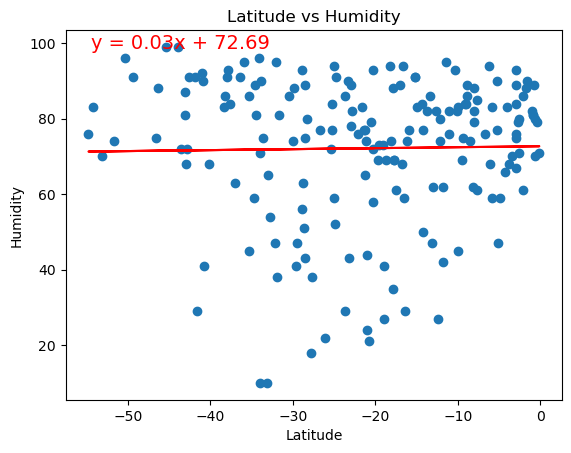

In [63]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
xlabel = 'Latitude'
ylabel = 'Humidity'

linear_regression(x, y, xlabel, ylabel, 'output_data/Fig08.png')

**Discussion about the linear relationship:** 
The low r^2 values from the linear regression analysis indicate minimal to no linear correlation between latitude and longitude in both the northern and southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.028337406202724885


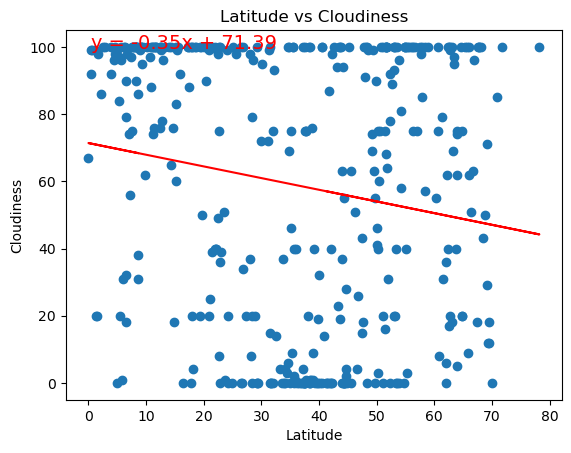

In [64]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
xlabel = 'Latitude'
ylabel = 'Cloudiness'

linear_regression(x, y, xlabel, ylabel, 'output_data/Fig09.png')

The r^2 value is: 0.0041836300795829


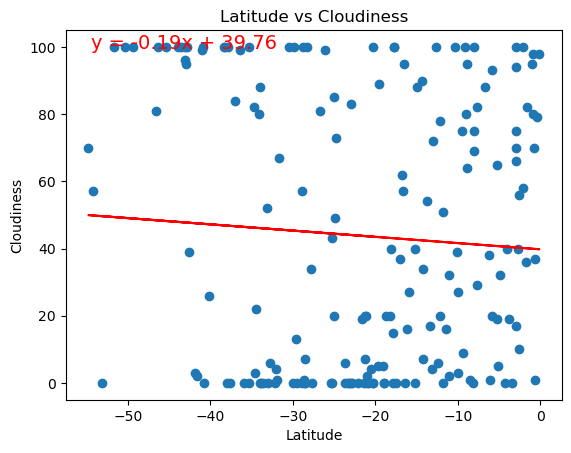

In [65]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
xlabel = 'Latitude'
ylabel = 'Cloudiness'

linear_regression(x, y, xlabel, ylabel, 'output_data/Fig10.png')

**Discussion about the linear relationship:** 
The low r^2 values from the linear regression analysis indicate minimal to no linear correlation between latitude and cloudiness in both the northern and southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.009675398837962442


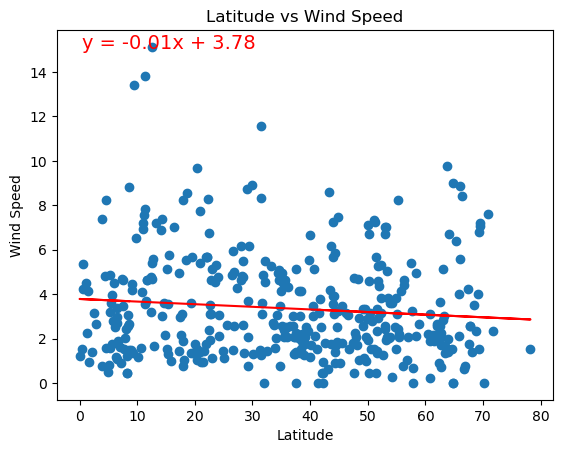

In [66]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
xlabel = 'Latitude'
ylabel = 'Wind Speed'

linear_regression(x, y, xlabel, ylabel, 'output_data/Fig11.png')

The r^2 value is: 0.026448490769406807


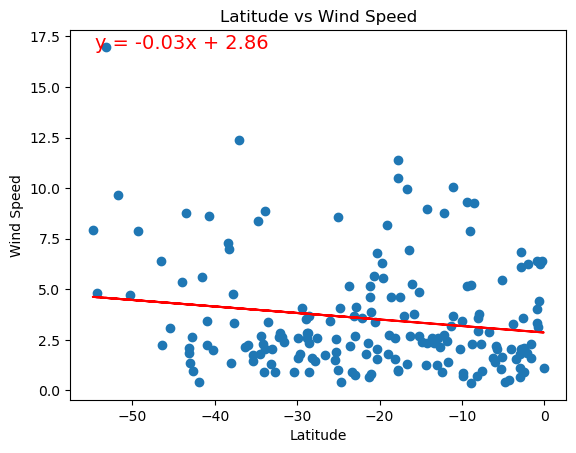

In [67]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
xlabel = 'Latitude'
ylabel = 'Wind Speed'

linear_regression(x, y, xlabel, ylabel, 'output_data/Fig12.png')

**Discussion about the linear relationship:**
The low r^2 values from the linear regression analysis indicate minimal to no linear correlation between latitude and wind speed in both the northern and southern hemispheres.